In [1]:
import numpy as np
import pandas as pd


from scipy.stats import norm
from scipy.io import loadmat

from scipy.optimize import leastsq
from scipy.optimize import least_squares
from scipy.io import loadmat
from scipy.interpolate import interp1d
from scipy.stats import norm
import multiprocessing as mp
from scipy.fft import fft, ifft, fftshift,ifftshift
from scipy.signal import fftconvolve

import matplotlib

from scipy.signal import sosfilt, butter

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
import matplotlib.pyplot as plt
%matplotlib widget

In [3]:
time_min=-3
time_max=3
nx = 500000

time =np.arange(time_min,time_max,(time_max-time_min)/(nx-1))

currents = np.arange(0,1600,100) # Stimulus amplitudes

tIndex = np.intersect1d(np.where(time*1e3>0),np.where(time*1e3<10))

iteration = 0 # Irrelelevant since there is only one iteration

In [4]:
def getDiameters():
    
   
    minDiam = .1
    maxDiam = 15
    
    d = np.linspace(minDiam,maxDiam,2000)*1e-6

    return d

d = getDiameters()  

In [5]:
outputfolder = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic_lowCurrent_long'

distanceIdx = 0 # 6 cm

maffAll = np.load(outputfolder+'/'+str(iteration)+'/maff/'+str(distanceIdx)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    maffAll = np.vstack((maffAll,np.load(outputfolder+'/'+str(iteration)+'/maff/'+str(distanceIdx)+'/signals_'+str(i)+'.npy')[np.newaxis]))
    
meffAll = np.load(outputfolder+'/'+str(iteration)+'/meff/'+str(distanceIdx)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    meffAll = np.vstack((meffAll,np.load(outputfolder+'/'+str(iteration)+'/meff/'+str(distanceIdx)+'/signals_'+str(i)+'.npy')[np.newaxis]))

uaffAll = np.load(outputfolder+'/'+str(iteration)+'/uaff/'+str(distanceIdx)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    uaffAll = np.vstack((uaffAll,np.load(outputfolder+'/'+str(iteration)+'/uaff/'+str(distanceIdx)+'/signals_'+str(i)+'.npy')[np.newaxis]))

ueffAll = np.load(outputfolder+'/'+str(iteration)+'/ueff/'+str(0)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    ueffAll = np.vstack((ueffAll,np.load(outputfolder+'/'+str(iteration)+'/ueff/'+str(0)+'/signals_'+str(i)+'.npy')[np.newaxis]))

totalAll = maffAll + meffAll+ uaffAll + ueffAll


In [6]:
signals = np.sum(totalAll,axis=0)

In [7]:
tIndex[0]

250000

In [8]:
totalAll[0,:,tIndex].shape

(833, 16)

In [11]:
recruitment = []
for i in range(39):
    recruitment.append(np.load(outputfolder+'/'+str(iteration)+'/recruitment/recruitment_'+str(i)+'.npy',allow_pickle=True))
    

In [10]:
amplitudes = np.max(signals[:,tIndex],axis=1)-np.min(signals[:,tIndex],axis=1)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

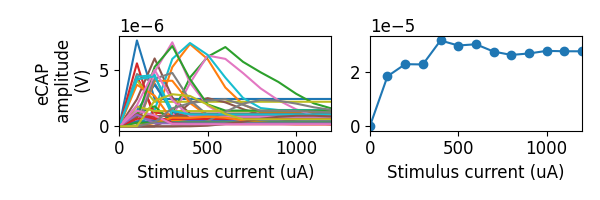

In [12]:
plt.figure(figsize=(6,2))

plt.subplot(1,2,1)

for i in range(39):
    
    amp = np.max(totalAll[i,:,tIndex],axis=0)-np.min(totalAll[i,:,tIndex],axis=0)
    
    plt.plot(currents,amp)

plt.xlim([0,1200])
    
plt.xlabel('Stimulus current (uA)')
plt.ylabel('eCAP\n amplitude\n (V)')

plt.subplot(1,2,2)

plt.plot(currents,amplitudes,'-o')

plt.xlabel('Stimulus current (uA)')

plt.xlim([0,1200])

plt.tight_layout()

plt.savefig('figures/monotonicity.png',dpi=300)

In [12]:
len(currents)

20

IndexError: index 20 is out of bounds for axis 0 with size 20

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


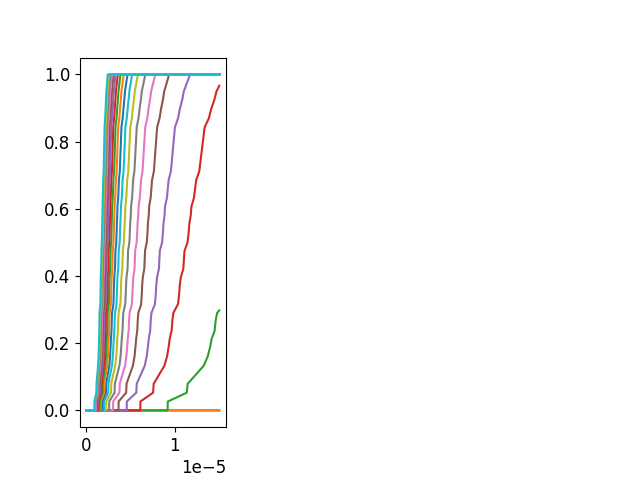

In [13]:


for i in range(39):
    
    plt.figure()
    
    plt.subplot(1,3,1)
    
    for x, j in enumerate(np.arange(0,25,1)):

        plt.plot(d,recruitment[i][j][0],c='C'+str(x))
        
    plt.subplot(1,3,2)
    
    amp = np.max(totalAll[i,:,tIndex],axis=0)-np.min(totalAll[i,:,tIndex],axis=0)
    
    plt.plot(currents,amp)
    
    plt.subplot(1,3,3)
    
    for j in range(20):
        plt.plot(time[1:-1]*1e3,totalAll[i,j])
        plt.xlim([0,10])

In [ ]:
plt.figure()
for i in range(39):
    
    amp = np.max(totalAll[i,:,tIndex],axis=0)-np.min(totalAll[i,:,tIndex],axis=0)
    
    plt.plot(currents,amp)
    
    plt.xlabel('stimulus amplitude')
    plt.ylabel('Signal amplitude')